<a href="https://colab.research.google.com/github/jackychia/AIforCE/blob/master/%E7%B5%B1%E4%B8%802912_model%E9%9A%8E%E6%AE%B5%E4%B8%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!nvidia-smi

Sun Jul 26 11:02:03 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
!pip install seaborn
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-d_xaragt
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-d_xaragt
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0bf21b3d35251c86f4a20d988439843d32b3c8d6c_-cp36-none-any.whl size=124955 sha256=4b35e81ff38805384ea3c9b87a02a8fe80f51e8166df954f5acc48907fe13aad
  Stored in directory: /tmp/pip-ephem-wheel-cache-frwoz2uw/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [12]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.2.0


In [13]:
#import檔案
dataset_path = keras.utils.get_file("2912", "https://raw.githubusercontent.com/jackychia/AIforCE/master/2912")
dataset_path
#column_names = ['open_pre','open','high','low','close','adj_close','volume']
dataset = pd.read_csv(dataset_path,na_values="0")
dataset

90112/89837 [==============================] - 0s 0us/step


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-24,216.5,217.0,214.5,215.5,177.009445,342000.0
1,2015-07-27,214.0,214.0,212.5,213.0,174.955978,847000.0
2,2015-07-28,211.0,216.5,210.0,213.0,174.955978,1173000.0
3,2015-07-29,212.5,213.0,211.0,213.0,174.955978,1078000.0
4,2015-07-30,214.0,225.0,214.0,225.0,184.812653,2803000.0
...,...,...,...,...,...,...,...
1219,2020-07-17,292.0,292.0,289.5,290.0,290.000000,703081.0
1220,2020-07-20,290.0,291.5,290.0,291.0,291.000000,807135.0
1221,2020-07-21,291.0,291.0,289.0,289.0,289.000000,1504961.0
1222,2020-07-22,289.0,291.5,288.5,291.0,291.000000,951691.0


In [14]:
dataset.isna().sum()

Date          0
Open          5
High          5
Low           5
Close         5
Adj Close     5
Volume       10
dtype: int64

In [15]:
#drop NaN
dataset = dataset.dropna()
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-24,216.5,217.0,214.5,215.5,177.009445,342000.0
1,2015-07-27,214.0,214.0,212.5,213.0,174.955978,847000.0
2,2015-07-28,211.0,216.5,210.0,213.0,174.955978,1173000.0
3,2015-07-29,212.5,213.0,211.0,213.0,174.955978,1078000.0
4,2015-07-30,214.0,225.0,214.0,225.0,184.812653,2803000.0
...,...,...,...,...,...,...,...
1219,2020-07-17,292.0,292.0,289.5,290.0,290.000000,703081.0
1220,2020-07-20,290.0,291.5,290.0,291.0,291.000000,807135.0
1221,2020-07-21,291.0,291.0,289.0,289.0,289.000000,1504961.0
1222,2020-07-22,289.0,291.5,288.5,291.0,291.000000,951691.0


In [16]:
#add predict colume to "open_pre"
dataset['Open_pre'] = dataset['Open'].shift(-1)
open_pre = dataset.pop('Open_pre')
dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-24,216.5,217.0,214.5,215.5,177.009445,342000.0
1,2015-07-27,214.0,214.0,212.5,213.0,174.955978,847000.0
2,2015-07-28,211.0,216.5,210.0,213.0,174.955978,1173000.0
3,2015-07-29,212.5,213.0,211.0,213.0,174.955978,1078000.0
4,2015-07-30,214.0,225.0,214.0,225.0,184.812653,2803000.0
...,...,...,...,...,...,...,...
1219,2020-07-17,292.0,292.0,289.5,290.0,290.000000,703081.0
1220,2020-07-20,290.0,291.5,290.0,291.0,291.000000,807135.0
1221,2020-07-21,291.0,291.0,289.0,289.0,289.000000,1504961.0
1222,2020-07-22,289.0,291.5,288.5,291.0,291.000000,951691.0


In [17]:
#normalize
def norm(x):
  A = x.pop('Date')
  x = (x - dataset.min()) / (dataset.max() - dataset.min())
  x = x.transpose()
  x = x.append(A)
  x = x.transpose()
  return x
normed_dataset = norm(dataset)
normed_dataset

,Open,High,Low,Close,Adj Close,Volume,Date
0,0.125698,0.122616,0.150142,0.125698,0.0713725,0.036503,2015-07-24
1,0.111732,0.106267,0.13881,0.111732,0.0605112,0.0915444,2015-07-27
2,0.0949721,0.119891,0.124646,0.111732,0.0605112,0.127076,2015-07-28
3,0.103352,0.100817,0.130312,0.111732,0.0605112,0.116722,2015-07-29
4,0.111732,0.166213,0.147309,0.178771,0.112646,0.304734,2015-07-30
...,...,...,...,...,...,...,...
1219,0.547486,0.531335,0.575071,0.541899,0.669009,0.0758583,2020-07-17
1220,0.536313,0.52861,0.577904,0.547486,0.674299,0.0871994,2020-07-20
1221,0.541899,0.525886,0.572238,0.536313,0.66372,0.163257,2020-07-21
1222,0.530726,0.52861,0.569405,0.547486,0.674299,0.102955,2020-07-22


In [18]:
#add "weekday","year","Month" colume from "Date"
normed_dataset['Date'] = pd.to_datetime(normed_dataset['Date'], format='%Y-%m-%d')
normed_dataset['weekday'] = normed_dataset['Date'].apply(lambda x: x.day)
normed_dataset['year'] = normed_dataset['Date'].apply(lambda x: x.year)
normed_dataset['Month'] = normed_dataset['Date'].apply(lambda x: x.month)
normed_dataset

,Open,High,Low,Close,Adj Close,Volume,Date,weekday,year,Month
0,0.125698,0.122616,0.150142,0.125698,0.0713725,0.036503,2015-07-24,24,2015,7
1,0.111732,0.106267,0.13881,0.111732,0.0605112,0.0915444,2015-07-27,27,2015,7
2,0.0949721,0.119891,0.124646,0.111732,0.0605112,0.127076,2015-07-28,28,2015,7
3,0.103352,0.100817,0.130312,0.111732,0.0605112,0.116722,2015-07-29,29,2015,7
4,0.111732,0.166213,0.147309,0.178771,0.112646,0.304734,2015-07-30,30,2015,7
...,...,...,...,...,...,...,...,...,...,...
1219,0.547486,0.531335,0.575071,0.541899,0.669009,0.0758583,2020-07-17,17,2020,7
1220,0.536313,0.52861,0.577904,0.547486,0.674299,0.0871994,2020-07-20,20,2020,7
1221,0.541899,0.525886,0.572238,0.536313,0.66372,0.163257,2020-07-21,21,2020,7
1222,0.530726,0.52861,0.569405,0.547486,0.674299,0.102955,2020-07-22,22,2020,7


In [19]:
normed_dataset = normed_dataset.transpose()
normed_dataset = normed_dataset.append(open_pre)
normed_dataset = normed_dataset.transpose()
normed_dataset = normed_dataset.dropna()
normed_dataset

,Open,High,Low,Close,Adj Close,Volume,Date,weekday,year,Month,Open_pre
0,0.125698,0.122616,0.150142,0.125698,0.0713725,0.036503,2015-07-24,24,2015,7,214
1,0.111732,0.106267,0.13881,0.111732,0.0605112,0.0915444,2015-07-27,27,2015,7,211
2,0.0949721,0.119891,0.124646,0.111732,0.0605112,0.127076,2015-07-28,28,2015,7,212.5
3,0.103352,0.100817,0.130312,0.111732,0.0605112,0.116722,2015-07-29,29,2015,7,214
4,0.111732,0.166213,0.147309,0.178771,0.112646,0.304734,2015-07-30,30,2015,7,225
...,...,...,...,...,...,...,...,...,...,...,...
1218,0.522346,0.531335,0.560907,0.536313,0.66372,0.154354,2020-07-16,16,2020,7,292
1219,0.547486,0.531335,0.575071,0.541899,0.669009,0.0758583,2020-07-17,17,2020,7,290
1220,0.536313,0.52861,0.577904,0.547486,0.674299,0.0871994,2020-07-20,20,2020,7,291
1221,0.541899,0.525886,0.572238,0.536313,0.66372,0.163257,2020-07-21,21,2020,7,289


In [20]:
#train & test
test = normed_dataset[-30:]
test = test.reset_index()
train = normed_dataset[(normed_dataset['year']==2019)|((normed_dataset['year']==2020)&(normed_dataset['Month']<=5))|((normed_dataset['year']==2020)&(normed_dataset['Month']==6)&(normed_dataset['weekday']<=20))]
train = train.reset_index()

In [21]:
#Keep the feature u want
train.drop(['Date','year',"index",'Month','weekday','Close','High','Low','Adj Close'], axis=1, inplace=True) #feature數測試_看數據方差改變情況
test.drop(['Date','year',"index",'Month','weekday','Close','High','Low','Adj Close'], axis=1, inplace=True)

In [22]:
#Split features from labels
def train_windows(df, ref_day=5, predict_day=1):
    feature, solution = [], []
    for i in range(df.shape[0]-predict_day-ref_day):
        feature.append(np.array(df.iloc[i:i+ref_day,:-1]))
        solution.append(np.array(df.iloc[i+ref_day:i+ref_day+predict_day]["Open_pre"]))
    return np.array(feature), np.array(solution)

In [23]:
feature_train, solution_train = train_windows(train, 5, 1)
feature_test, solution_test = train_windows(test, 5, 1)

In [24]:
solution_train

array([[320.0],
       [321.0],
       [315.0],
       [316.5],
       [316.0],
       [315.0],
       [314.0],
       [320.0],
       [317.0],
       [316.5],
       [319.0],
       [322.0],
       [323.0],
       [320.0],
       [322.5],
       [320.0],
       [320.0],
       [319.5],
       [312.5],
       [317.0],
       [317.0],
       [312.5],
       [312.0],
       [316.0],
       [317.0],
       [318.5],
       [317.0],
       [317.0],
       [318.5],
       [304.5],
       [299.5],
       [300.5],
       [299.0],
       [300.0],
       [298.0],
       [298.0],
       [296.5],
       [294.0],
       [297.5],
       [295.5],
       [296.0],
       [297.0],
       [299.0],
       [294.5],
       [292.0],
       [294.5],
       [295.0],
       [298.5],
       [303.5],
       [296.5],
       [294.5],
       [292.5],
       [293.5],
       [294.0],
       [293.0],
       [293.0],
       [291.0],
       [290.5],
       [290.5],
       [284.0],
       [282.0],
       [284.0],
       [

In [25]:
solution_test

array([[300.0],
       [299.5],
       [298.5],
       [298.5],
       [298.5],
       [300.5],
       [299.0],
       [297.0],
       [297.0],
       [296.5],
       [298.5],
       [297.5],
       [300.0],
       [299.0],
       [296.5],
       [295.0],
       [291.5],
       [288.0],
       [287.5],
       [287.5],
       [292.0],
       [290.0],
       [291.0],
       [289.0]], dtype=object)

In [26]:
feature_train

array([[[0.6536312849162011, 0.2865734298051033],
        [0.5921787709497207, 0.1397809592070202],
        [0.5810055865921788, 0.20142907092732878],
        [0.6312849162011173, 0.2062750029646061],
        [0.6675977653631285, 0.11617800802885085]],

       [[0.5921787709497207, 0.1397809592070202],
        [0.5810055865921788, 0.20142907092732878],
        [0.6312849162011173, 0.2062750029646061],
        [0.6675977653631285, 0.11617800802885085],
        [0.6787709497206704, 0.27832234249222226]],

       [[0.5810055865921788, 0.20142907092732878],
        [0.6312849162011173, 0.2062750029646061],
        [0.6675977653631285, 0.11617800802885085],
        [0.6787709497206704, 0.27832234249222226],
        [0.7039106145251397, 0.16484801162125587]],

       ...,

       [[0.5670391061452514, 0.3395457089942661],
        [0.5698324022346368, 0.3050082660193362],
        [0.5837988826815642, 0.25275032610667003],
        [0.5810055865921788, 0.11758434304329023],
        [0.569832402

In [18]:
"""
LSTM : 
return_sequences=True 是為了將此層輸出維持2D 傳遞到下一層LSTM 若是為fualt則會平板化!
"""

'\nLSTM : \nreturn_sequences=True 是為了將此層輸出維持2D 傳遞到下一層LSTM 若是為fualt則會平板化!\n'

In [27]:
def lstm_stock_model(shape):
  model = keras.Sequential()
  model.add(layers.LSTM(64, input_shape=(shape[1], shape[2]), return_sequences=True))
  model.add(layers.BatchNormalization())
  model.add(layers.LSTM(256, return_sequences=True))
  model.add(layers.BatchNormalization())
  model.add(layers.TimeDistributed(layers.Dense(1)))
  model.add(layers.LSTM(256))
  model.add(layers.Flatten())

  model.add(layers.Dense(5,activation='linear'))
  model.add(layers.Dense(1,activation='linear'))

  Optimizer = keras.optimizers.RMSprop(0.001)
  Optimizer1 = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
  Optimizer2 = keras.optimizers.Adam(learning_rate=0.0001)

  #目前測試L_rate越小越好


  model.compile(loss='mse', optimizer=Optimizer2, metrics=['mae', 'mse'])
  return model

In [28]:
model = lstm_stock_model(feature_train.shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 64)             17152     
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 64)             256       
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 256)            328704    
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 256)            1024      
_________________________________________________________________
time_distributed (TimeDistri (None, 5, 1)              257       
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               264192    
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [29]:
print(feature_train)

[[[0.6536312849162011 0.2865734298051033]
  [0.5921787709497207 0.1397809592070202]
  [0.5810055865921788 0.20142907092732878]
  [0.6312849162011173 0.2062750029646061]
  [0.6675977653631285 0.11617800802885085]]

 [[0.5921787709497207 0.1397809592070202]
  [0.5810055865921788 0.20142907092732878]
  [0.6312849162011173 0.2062750029646061]
  [0.6675977653631285 0.11617800802885085]
  [0.6787709497206704 0.27832234249222226]]

 [[0.5810055865921788 0.20142907092732878]
  [0.6312849162011173 0.2062750029646061]
  [0.6675977653631285 0.11617800802885085]
  [0.6787709497206704 0.27832234249222226]
  [0.7039106145251397 0.16484801162125587]]

 ...

 [[0.5670391061452514 0.3395457089942661]
  [0.5698324022346368 0.3050082660193362]
  [0.5837988826815642 0.25275032610667003]
  [0.5810055865921788 0.11758434304329023]
  [0.5698324022346368 0.16447394808800345]]

 [[0.5698324022346368 0.3050082660193362]
  [0.5837988826815642 0.25275032610667003]
  [0.5810055865921788 0.11758434304329023]
  [0.5

In [30]:
print(type(feature_train))

<class 'numpy.ndarray'>


In [31]:
#類型轉換才能輸入於fit()
from keras import backend as K
feature_train = K.cast_to_floatx(feature_train)
solution_train = K.cast_to_floatx(solution_train)

Using TensorFlow backend.


In [32]:
#fit model
EPOCHS = 1000
Batch_size = 5   #預設5
Batch_size=eval(input('The batch_size (default= 5):') or '5')
EPOCHS=eval(input('Epochs (default 1000):') or '1000')

callback = keras.callbacks.EarlyStopping(monitor="loss", patience=50, verbose=1, mode="auto",restore_best_weights=False) #[tfdocs.modeling.EpochDots()]

history = model.fit(feature_train, solution_train, batch_size=Batch_size, epochs=EPOCHS, validation_split=0.1, verbose=2, callbacks=[callback],shuffle=True)
                    #[callback],shuffle=True)

The batch_size (default= 5):
Epochs (default 1000):
Epoch 1/1000
63/63 - 2s - loss: 87953.8203 - mae: 296.3695 - mse: 87953.8203 - val_loss: 89950.9531 - val_mae: 299.9010 - val_mse: 89950.9531
Epoch 2/1000
63/63 - 1s - loss: 77095.4609 - mae: 277.3881 - mse: 77095.4609 - val_loss: 88079.7031 - val_mae: 296.7648 - val_mse: 88079.7031
Epoch 3/1000
63/63 - 1s - loss: 66781.4219 - mae: 258.1812 - mse: 66781.4219 - val_loss: 80184.9844 - val_mae: 283.1510 - val_mse: 80184.9844
Epoch 4/1000
63/63 - 1s - loss: 61356.5781 - mae: 247.4618 - mse: 61356.5781 - val_loss: 68101.7188 - val_mae: 260.9428 - val_mse: 68101.7188
Epoch 5/1000
63/63 - 1s - loss: 57070.1367 - mae: 238.6522 - mse: 57070.1367 - val_loss: 58916.1992 - val_mae: 242.7052 - val_mse: 58916.1992
Epoch 6/1000
63/63 - 1s - loss: 53161.2578 - mae: 230.3204 - mse: 53161.2578 - val_loss: 53185.1680 - val_mae: 230.5968 - val_mse: 53185.1680
Epoch 7/1000
63/63 - 1s - loss: 49546.6641 - mae: 222.3417 - mse: 49546.6641 - val_loss: 48960.6

(0.0, 30.0)

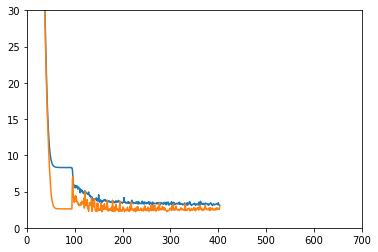

In [33]:
#mae
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.xlim([0,700])
plt.ylim([0,30])

(0.0, 30.0)

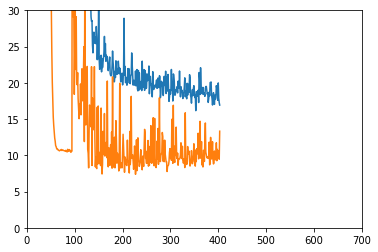

In [34]:
#mse
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.xlim([0,700])
plt.ylim([0,30])

(0.0, 45.0)

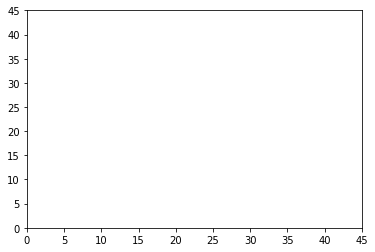

In [35]:
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlim([0,45])
plt.ylim([0,45])

In [36]:
feature_test = K.cast_to_floatx(feature_test)
solution_test = K.cast_to_floatx(solution_test)
solution_predict = model.predict(feature_test)

In [29]:
solution_predict

array([[292.00052],
       [293.21506],
       [297.9014 ],
       [297.53726],
       [296.78833],
       [297.5786 ],
       [297.34967],
       [299.62665],
       [298.15735],
       [296.4487 ],
       [295.45853],
       [295.46344],
       [297.62057],
       [296.51163],
       [297.8822 ],
       [298.0997 ],
       [296.46057],
       [294.46414],
       [290.59937],
       [284.98462],
       [281.95276],
       [280.0958 ],
       [285.767  ],
       [287.89825]], dtype=float32)

In [30]:
solution_test

array([[300. ],
       [299.5],
       [298.5],
       [298.5],
       [298.5],
       [300.5],
       [299. ],
       [297. ],
       [297. ],
       [296.5],
       [298.5],
       [297.5],
       [300. ],
       [299. ],
       [296.5],
       [295. ],
       [291.5],
       [288. ],
       [287.5],
       [287.5],
       [292. ],
       [290. ],
       [291. ],
       [289. ]], dtype=float32)

In [37]:
#evaluate loss
loss = model.evaluate(feature_test,solution_test)

1/1 [==============================] - 0s 1ms/step - loss: 19.1176 - mae: 3.5994 - mse: 19.1176


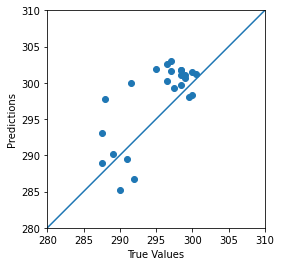

In [38]:
#ture & predict比較圖
a = plt.axes(aspect='equal')
plt.scatter(solution_test, solution_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [280,310]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


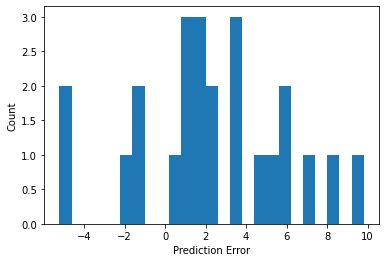

In [39]:
#errort長條圖
error = solution_predict - solution_test
plt.hist(error,bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")
